In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('training_set.csv')

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [8]:
data['Loan_Amount_Term'] = data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].median())

In [9]:
data['Loan_Amount_Term'] = data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode())

In [10]:
data['Loan_Amount_Term'].mean()

342.4104234527687

In [11]:
data['Loan_Amount_Term'].mean()

342.4104234527687

In [12]:
data['ApplicantIncome'].fillna(0,inplace=True)
data['CoapplicantIncome'].fillna(0,inplace=True)

In [13]:
data["Total Income"] = data["ApplicantIncome"]+data["CoapplicantIncome"]


In [14]:
data["Dependents"].fillna(0,inplace=True)

In [15]:
def convertoyears(row):
    months =row["Loan_Amount_Term"]
    return months/12

data["Loan years"] = data.apply(lambda row: convertoyears(row), axis=1)

In [16]:
Gender = pd.get_dummies(data["Gender"],prefix="Gender")
Married = pd.get_dummies(data["Married"],prefix="Married")
Education = pd.get_dummies(data["Education"],prefix="Education")
SelfEmployed = pd.get_dummies(data["Self_Employed"],prefix="Self_Employed")
Propertyarea = pd.get_dummies(data["property_Area"],prefix="property_Area")

In [17]:
data2 = pd.concat([data,Gender,Education,SelfEmployed,Propertyarea],axis=1)

In [18]:
def changeDepend(row):
    D = row['Dependents']
    if D =="3+":
        return 3
    else:
        return int(D)
data2["Dependents_num"] = data.apply(lambda row:changeDepend(row),axis=1)

In [19]:
data2.drop(["Gender","Married","Education","Self_Employed","property_Area","Dependents","ApplicantIncome","CoapplicantIncome"],inplace=True,axis=1)

In [20]:
data2.isnull().sum()

Loan_ID                     0
LoanAmount                 22
Loan_Amount_Term            0
Credit_History             50
Loan_Status                 0
Total Income                0
Loan years                  0
Gender_Female               0
Gender_Male                 0
Education_Graduate          0
Education_Not Graduate      0
Self_Employed_No            0
Self_Employed_Yes           0
property_Area_Rural         0
property_Area_Semiurban     0
property_Area_Urban         0
Dependents_num              0
dtype: int64

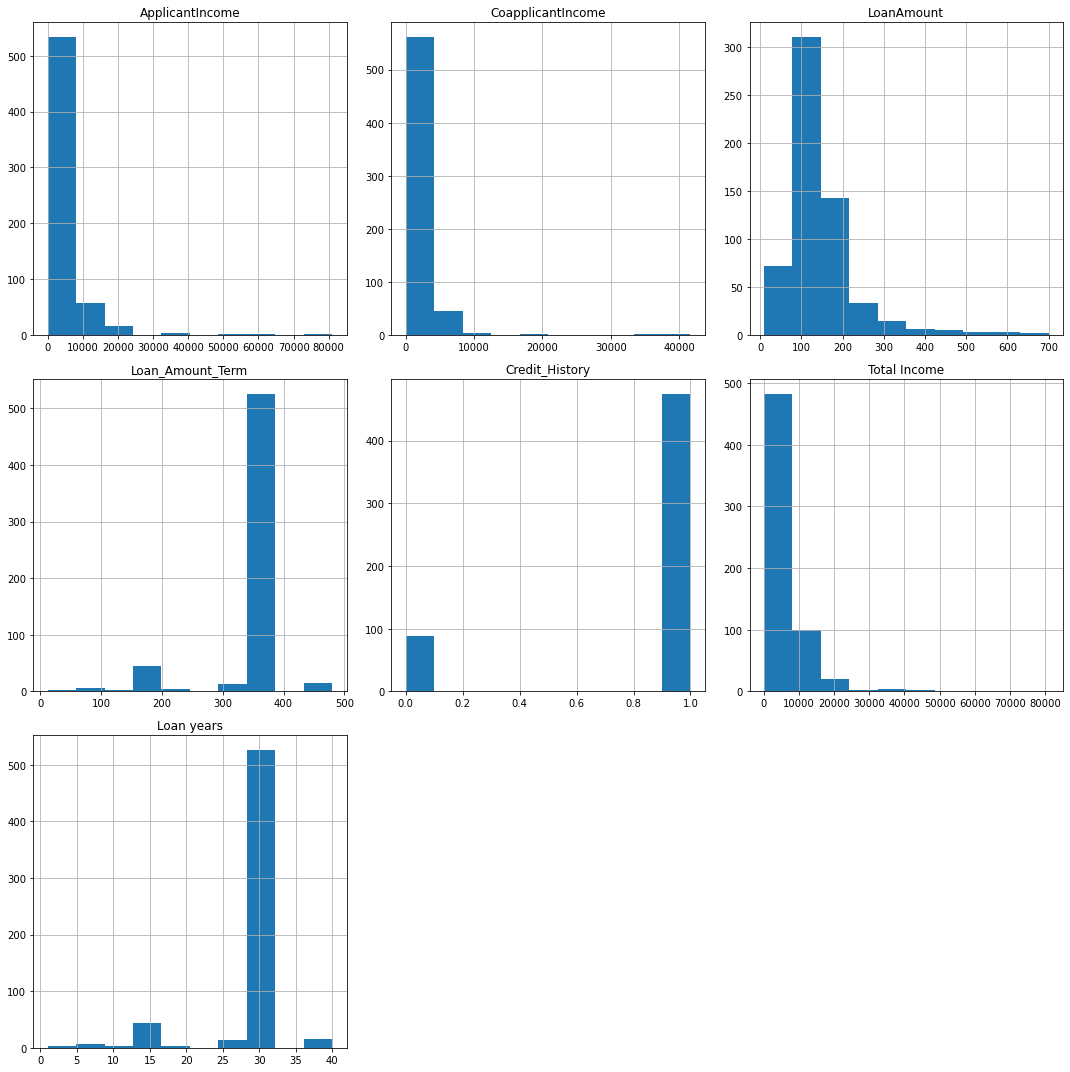

In [21]:
data.hist(figsize=(15,15))
plt.tight_layout()

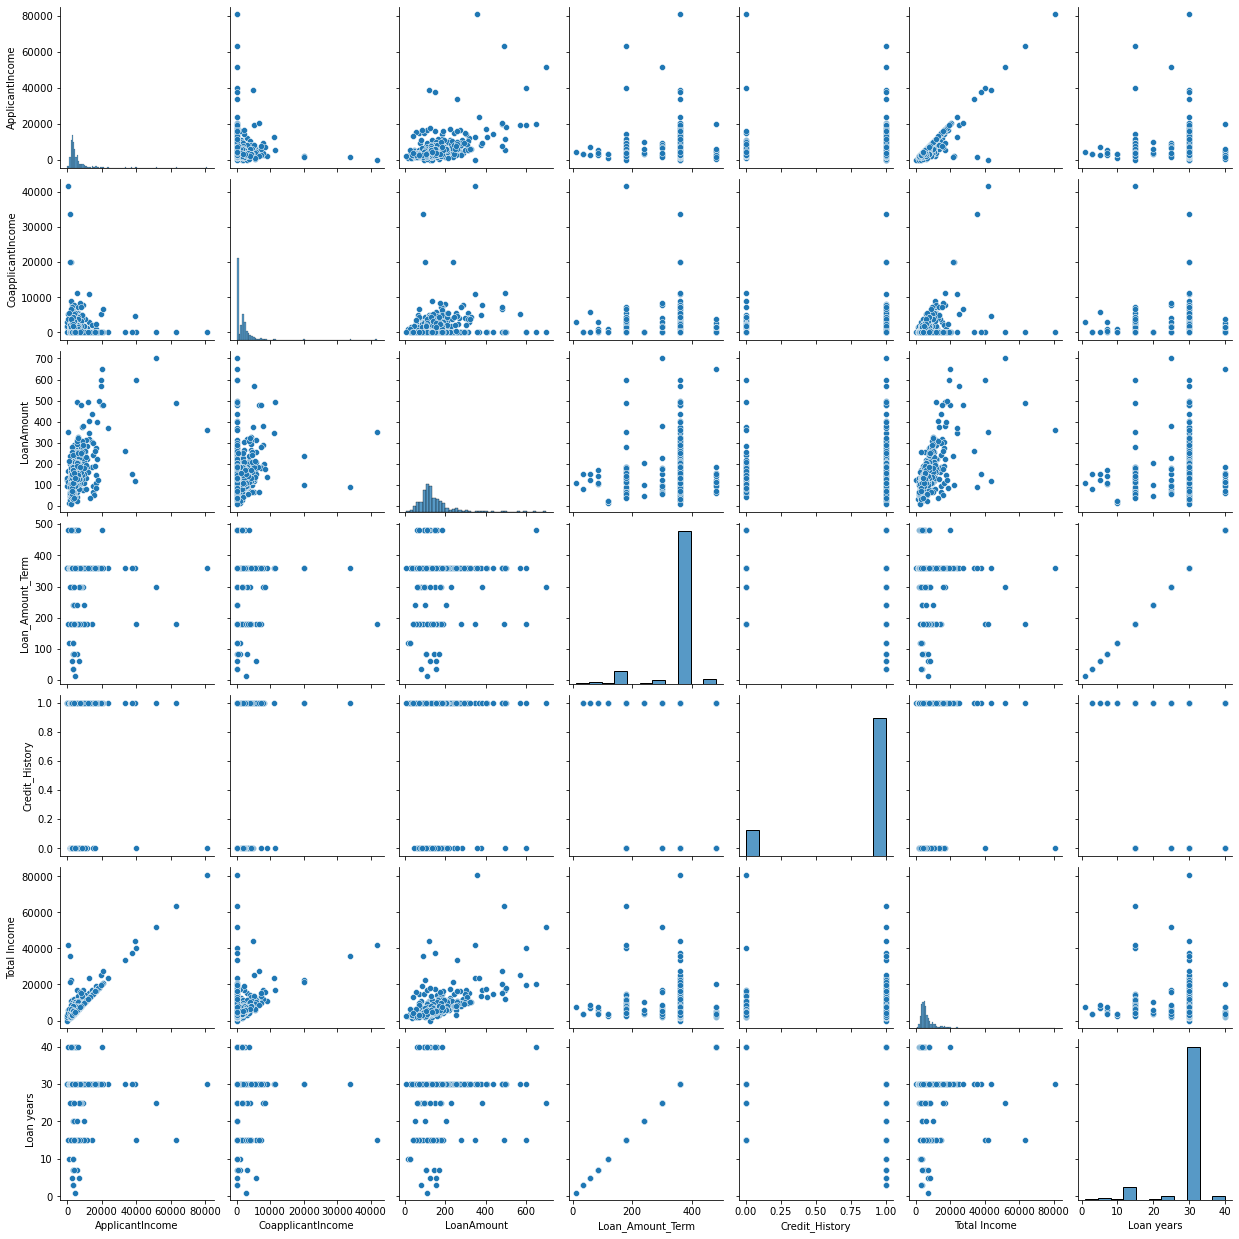

In [22]:
sns.pairplot(data)

<AxesSubplot:>

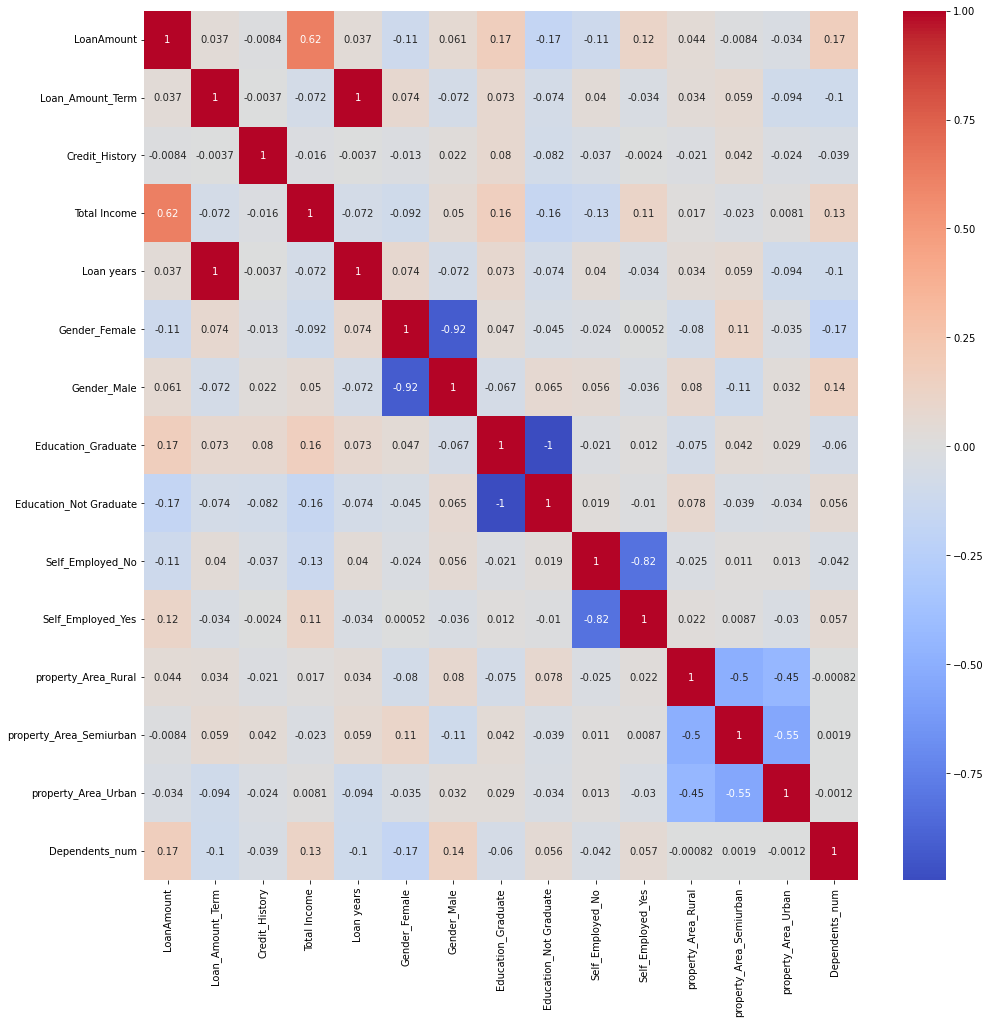

In [23]:
plt.figure(figsize=(16, 16))
sns.heatmap(data2.corr(), annot = True, cmap="coolwarm")

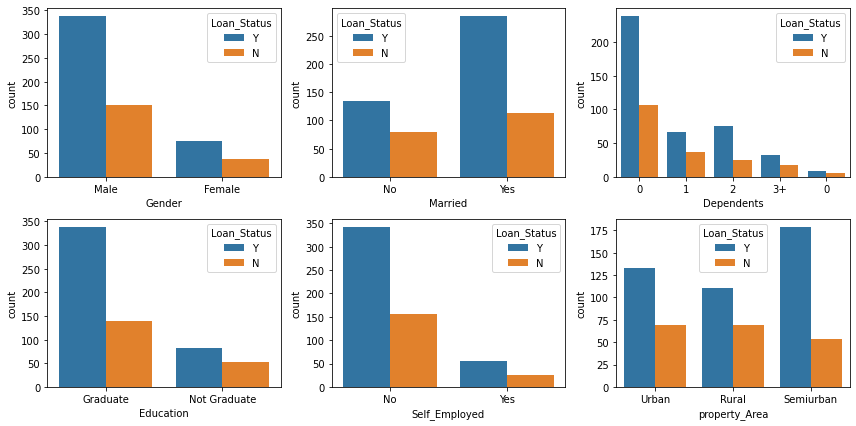

In [24]:
countplot_list = ["Gender","Married","Dependents","Education","Self_Employed","property_Area"]
plt.figure(figsize=(12,6))
x=1
for i in countplot_list:
    plt.subplot(2,3,x)
    sns.countplot(x=i,hue='Loan_Status',data=data)
    x = x + 1
plt.tight_layout()

In [28]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split functions
from sklearn.model_selection import train_test_split

# Import accuracy_score
from sklearn.metrics import accuracy_score

In [41]:
# Get the predictors and target the X and y variables from the dataset

X = data2[['Loan_Amount_Term', "Gender_Female","Gender_Male","Education_Graduate","Education_Not Graduate","Self_Employed_No","Self_Employed_Yes","property_Area_Rural","property_Area_Semiurban","property_Area_Urban","Dependents_num","Total Income"]]
y = data2['Loan_Status']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, 
                                                          stratify = y,
                                                          random_state = 1)

In [43]:
# Instantiate a decision tree dt and criterion
dt = DecisionTreeClassifier(criterion = 'entropy',  random_state = 1)
# dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)

In [44]:
data2.isnull().sum()

Loan_ID                     0
LoanAmount                 22
Loan_Amount_Term            0
Credit_History             50
Loan_Status                 0
Total Income                0
Loan years                  0
Gender_Female               0
Gender_Male                 0
Education_Graduate          0
Education_Not Graduate      0
Self_Employed_No            0
Self_Employed_Yes           0
property_Area_Rural         0
property_Area_Semiurban     0
property_Area_Urban         0
Dependents_num              0
dtype: int64

In [45]:
dt.fit(X_train, y_train) 
y_pred = dt.predict(X_test)
dt.classes_

array(['N', 'Y'], dtype=object)

In [46]:
# Print the accuracy of labels predicted.
accuracy = accuracy_score(y_test, y_pred)
round(accuracy,2)

0.62

In [49]:
from sklearn.metrics import classification_report

class_labels = data2['Loan_Status'].unique()
print(classification_report(y_test, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

           Y       0.39      0.38      0.39        58
           N       0.72      0.73      0.73       127

    accuracy                           0.62       185
   macro avg       0.56      0.56      0.56       185
weighted avg       0.62      0.62      0.62       185

